Range Test: [ -6.333585879135576 , 9.165568414879987 ]
Range X_List: [ -29.58231732015892 , 32.352303238727266 ]
Density Data Points:  1000


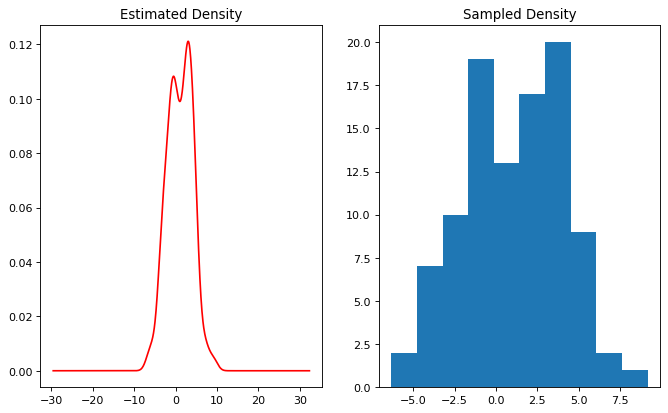

Evaluating Integral from [-100000.00, 100000.00]
	Lower: 0 | x_list[0] = -29.582
	Upper: 999 | x_list[999] = 32.352
Evaluating Integral from [-100000.00, 0.00]
	Lower: 0 | x_list[0] = -29.582
	Upper: 478 | x_list[478] = 0.052
Evaluating Integral from [-3.00, 3.00]
	Lower: 429 | x_list[429] = -2.986
	Upper: 526 | x_list[526] = 3.028
Evaluating Integral from [-6.00, 6.00]
	Lower: 381 | x_list[381] = -5.962
	Upper: 574 | x_list[574] = 6.004
Evaluating Integral from [-9.00, 9.00]
	Lower: 332 | x_list[332] = -8.999
	Upper: 623 | x_list[623] = 9.042
Full Range Probability: 1.000
Probability less than 0: 0.3882
Probability 1 Std Dev: 0.602
Probability 2 Std Dev: 0.944
Probability 3 Std Dev: 0.994


In [10]:
#Parzen Window Density Estimation:
#Accounts for any 1D dataset with values anywhere on the x axis
import numpy as np
from math import sqrt
from math import exp
import matplotlib.pyplot as plt

test = [-3, -2.5, 0, 1, 1.5, 1.7, 9, 10]
test = np.random.normal(1,3,100)
test.flatten()
test.tolist()
test.sort()

print("Range Test: [", test[0], ",", test[len(test)-1],"]")

def density_value(x_val, sample_list, h1):
    n = len(sample_list)
    hn = h1/sqrt(n)
    phi_sum = 0
    for sample in sample_list:
        u = (x_val-sample)/hn
        phi_sum += (1/hn)*(1/(sqrt(2*np.pi)))*exp(-((u**2)/2))
    return phi_sum/n

def sum_list(samp_list):
    list_sum = 0
    for samp in samp_list:
        list_sum += samp
    return list_sum

def get_probability(lower_bound, upper_bound, density_est):
    #Gets probability of range using trapezoid integration
    try:
        x_list = density_est[0]
        y_list = density_est[1]
    except:
        print("ERROR: Improper Density Function Input")
        return None
    n = len(x_list)
    #Check for range above sample range
    if upper_bound < x_list[0]:
        print("Range out of Density Range (LOW)-> Zero(ish) probability")
        return 0
    #check for range below sample range
    if lower_bound > x_list[n-1]:
        print("Range out of Density Range (HIGH)-> Zero(ish) probability")
        return 0
    #convert lower bound into pdf index
    start = 0
    end = n-1
    
    if lower_bound < x_list[0]:
        start = 0
    else:
        i=0
        while x_list[i] < lower_bound:
            i += 1
        start = i
        
    #convert upper_bound into pdf index
    if upper_bound > x_list[n-1]:
        end = n-1
    else:
        i=0
        while x_list[i] < upper_bound:
            i += 1
        end = i
    
    print("Evaluating Integral from [%.2f, %.2f]"%(lower_bound, upper_bound))
    print("\tLower: %d | x_list[%d] = %.3f"%(start, start, x_list[start]))
    print("\tUpper: %d | x_list[%d] = %.3f"%(end, end, x_list[end]))
    
    pdf_sum = 0
    for i in range(start, end):
        pdf_sum += ((y_list[i+1]+y_list[i])/2)*(x_list[i+1]-x_list[i])
        
    return pdf_sum
    
    

def gen_parzen_window(sample_list):
    #Input: 1D array of data points
    #Output: 2D array with list of X points and Y probabilities
    
    #Ensures that data is in ascending order
    sample_list.sort()
    adaptive = False
    #==== Create X list to generate density =====
    x_list = []
    if (adaptive):
        #FUCKING BUGGY FOR SOME REASON -> DONT FUCKING USE
        #Interpolate points to calculate between sampled points
        ave_dist = 0
        inter_points = 5 #Number of points to test between sample points (adaptively breaks range based on distance between points)
        for i in range(0, len(sample_list)-1):
            dist = sample_list[i+1]-sample_list[i]
            step = dist/inter_points
            ave_dist += dist
            for j in range(0,inter_points):
                x_list.append(sample_list[i]+step*j)

        #Extrapolate to include points outside of sample_point range
        ave_dist = ave_dist/(len(sample_list)-1)
        extra_points = 50 #number of to add to the end and front of the dataset
        step = ave_dist*5
        for i in range(0, extra_points):
            x_list.append(sample_list[0]-(i+1)*step)
            x_list.append(sample_list[len(sample_list)-1]+(i+1)*step)
        
    else:
        scaling_factor = 4
        data_range = sample_list[len(sample_list)-1]-sample_list[0]
        center = (sample_list[len(sample_list)-1]+sample_list[0])/2
        lower_bound = center - data_range*scaling_factor/2
        num_points = 1000
        step = (data_range*scaling_factor)/num_points
        for i in range(0, num_points):
            x_list.append(lower_bound+step*i)
            
    x_list.sort()
    
    print("Range X_List: [", x_list[0], ",", x_list[len(x_list)-1],"]")
    h1 = 10
    y_list = []
    for x in x_list:
        y_list.append(density_value(x, sample_list, h1))

    full_list = [x_list, y_list]
    
    return full_list
        
    
      
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w')

sub_plt = plt.subplot(1,2,1)
density = gen_parzen_window(test)
plt.plot(density[0], density[1], 'r')
sub_plt.title.set_text("Estimated Density")
print("Density Data Points: ", len(density[0]))

sub_plt = plt.subplot(1,2,2)
plt.hist(test, bins = (int(len(test)/10)))
sub_plt.title.set_text("Sampled Density")
plt.show()

full_range_prob = get_probability(-100000, 100000, density)
zero_prob = get_probability(-100000, 0, density)
one_std_dev = get_probability(-3, 3, density)
two_std_dev = get_probability(-6, 6, density)
three_std_dev = get_probability(-9, 9, density)
print("Full Range Probability: %.3f"%(full_range_prob))
print("Probability less than 0: %.4f"%(zero_prob/full_range_prob))
print("Probability 1 Std Dev: %.3f"%(one_std_dev/full_range_prob))
print("Probability 2 Std Dev: %.3f"%(two_std_dev/full_range_prob))
print("Probability 3 Std Dev: %.3f"%(three_std_dev/full_range_prob))


        

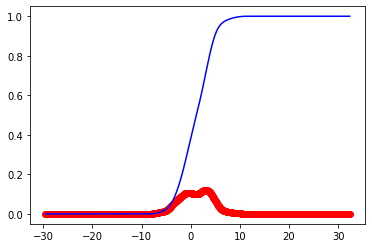

In [11]:
def generate_cdf(density_est):
    try:
        x_list = density_est[0]
        y_list = density_est[1]
    except:
        print("ERROR: Improper Density Function Input")
        return None
    
    cum_prob = [0]
    cum_prob_sum = 0
    n = len(x_list)
    
    for i in range(1,n):
        cum_prob_sum += ((y_list[i]+y_list[i-1])/2)*(x_list[i]-x_list[i-1])
        cum_prob.append(cum_prob_sum)
        
    return [x_list, cum_prob]

density_cdf = generate_cdf(density)
plt.plot(density[0], density[1], 'ro', density_cdf[0], density_cdf[1], 'b')
plt.show()

(array([5.000e+00, 1.500e+01, 2.800e+01, 5.400e+01, 8.600e+01, 1.120e+02,
        1.630e+02, 2.080e+02, 2.660e+02, 3.140e+02, 4.920e+02, 7.220e+02,
        9.640e+02, 1.174e+03, 1.400e+03, 1.543e+03, 1.753e+03, 2.034e+03,
        2.123e+03, 2.316e+03, 2.272e+03, 2.295e+03, 2.181e+03, 2.182e+03,
        2.177e+03, 2.156e+03, 2.388e+03, 2.526e+03, 2.643e+03, 2.479e+03,
        2.450e+03, 2.067e+03, 1.625e+03, 1.313e+03, 9.490e+02, 6.490e+02,
        4.140e+02, 3.510e+02, 2.530e+02, 2.110e+02, 1.570e+02, 1.270e+02,
        1.050e+02, 1.000e+02, 7.700e+01, 4.800e+01, 1.600e+01, 1.200e+01,
        2.000e+00, 3.000e+00]),
 array([-9.19563947, -8.76753   , -8.33942054, -7.91131107, -7.4832016 ,
        -7.05509213, -6.62698266, -6.19887319, -5.77076373, -5.34265426,
        -4.91454479, -4.48643532, -4.05832585, -3.63021639, -3.20210692,
        -2.77399745, -2.34588798, -1.91777851, -1.48966905, -1.06155958,
        -0.63345011, -0.20534064,  0.22276883,  0.65087829,  1.07898776,
         1.

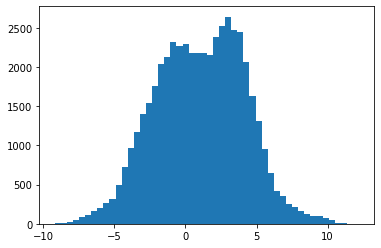

In [12]:
def quick_search(val, search_list):
    #Sorted List search for equivalent probability
    #returns index value for list
     
    print_out = False
    
    num = len(search_list)
    j = int(num/2)
    upper = num
    lower = 0
    diff = num
    steps = 0
    jumps = [j]
    x = [steps]
    
    while diff > 1:
        steps += 1
        if val > search_list[j]:
            lower = j
            diff = abs(j - int((upper + j)/2))
            j = int((upper + j)/2) 
        else:
            upper = j
            diff = abs(j - int((lower + j)/2))
            j = int((lower + j)/2)
        jumps.append(j)
        x.append(steps)
    
    if (print_out):
            print("Standard Fast Search: %d Steps"%(steps))
            print("J-value: %d\n\tSamp: %.4f\n\tProb: %.4f | %.4f | %.4f\n"%(j, val, search_list[j-1], search_list[j], search_list[j+1]))
            plt.plot(x, jumps)
            plt.show()
            
    return j

def generate_random_samples(num_samples, cdf):
    uni_samp = np.random.uniform(0,1,num_samples)
    
    print_out = False
    
    x_list = cdf[0]
    cum_prob = cdf[1]
    num_prob = len(cum_prob)
    
    gen_samples = []
    
    for samples in uni_samp:
            
        #Sorted List search for equivalent probability
        j = quick_search(samples, cum_prob)
        
        #Use J value to estimate X out
        #employs inverse CDf technique to convert uniform density to arbitrary
        if samples > cum_prob[j]:
            low = j
        else:
            low = j-1
        #linear interpolation to get more "exact" value
        perc = (samples - cum_prob[low])/(cum_prob[low+1]-cum_prob[low])
        x_out = perc*(x_list[low + 1]-x_list[low]) + x_list[low]
        
        if print_out:
            print("Samples: %.4f\nProb:  %.4f | %.4f\nX-val: %.3f | %.3f"%(samples, cum_prob[low], cum_prob[low+1], x_list[low], x_list[low+1]))
            print("Interpolated Value: %.3f\n\n"%(x_out))
        
        gen_samples.append(x_out)
    
        
    return gen_samples

rand_samps = generate_random_samples(50000, density_cdf)
plt.hist(rand_samps, bins=50)

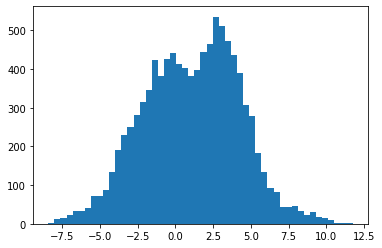

Chance Greater than 0: 0.624


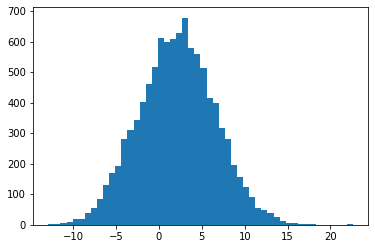

Chance Greater than 0: 0.687


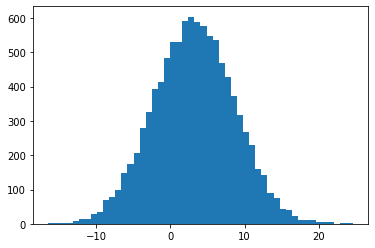

Chance Greater than 0: 0.719


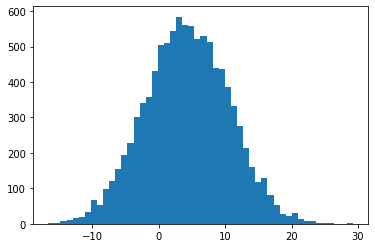

Chance Greater than 0: 0.749


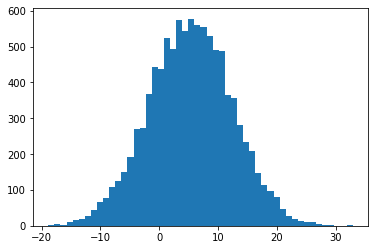

Chance Greater than 0: 0.770


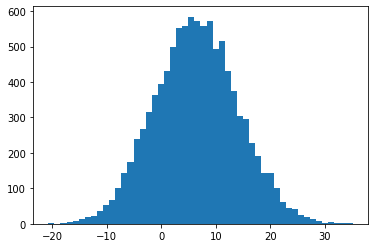

Chance Greater than 0: 0.796


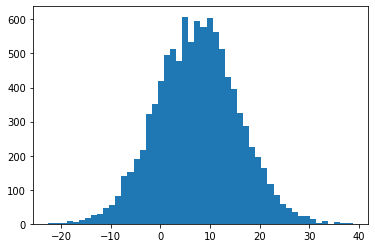

Chance Greater than 0: 0.819


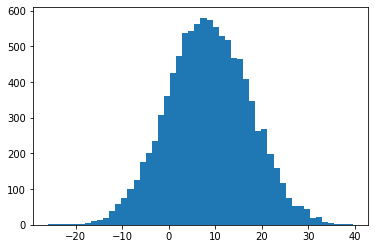

Chance Greater than 0: 0.839


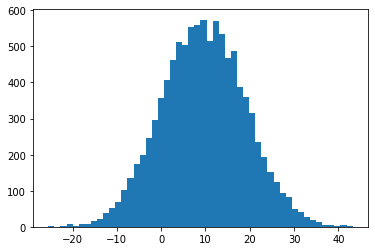

Chance Greater than 0: 0.843


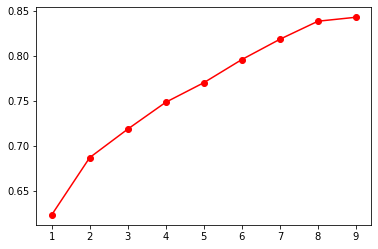

In [13]:
#Use random number generation from arbitrary density to do monte-carlo simulation
#Estimate Probability of ending positive in the next N terms

num_runs = 10000
periods = 10
chance_pos = []
period_cnt = []
for i in range(1,periods):
    outcomes = []
    for run in range(0, num_runs):
        samps = generate_random_samples(i, density_cdf)
        period_sum = 0
        for samp in samps:
            period_sum += samp
        outcomes.append(period_sum)

    plt.hist(outcomes, bins = 50)
    plt.show()
    outcomes.sort()
    ind = quick_search(0.0, outcomes)
    prob = 1-ind/len(outcomes)
    print("Chance Greater than 0: %.3f"%(prob))
    period_cnt.append(i)
    chance_pos.append(prob)
    
plt.plot(period_cnt, chance_pos, 'r', period_cnt, chance_pos, 'ro')
plt.show()